## Data Visualization

In this checkpoint you will be using a FIFA dataset of soccer player statistics to create a visualization, then also interpreting a visualization we have created.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


**1) Find the top 10 countries with the most players (using the 'Nationality' column). Create a bar chart showing the number of players in those 10 countries**

Don't forget to add a **title** and **x axis label** to your charts.

If you are unable to find the top 10 countries but want the chance to demonstrate your plotting skills use the following dummy data to create a bar chart
```
Country Name  | Num Players
============  | ===========
Country A     | 100
Country B     | 60
Country C     | 125
Country D     | 89
```

In [3]:
top_10 = df.Nationality.value_counts()[0:10]
top_10.index

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

<BarContainer object of 10 artists>

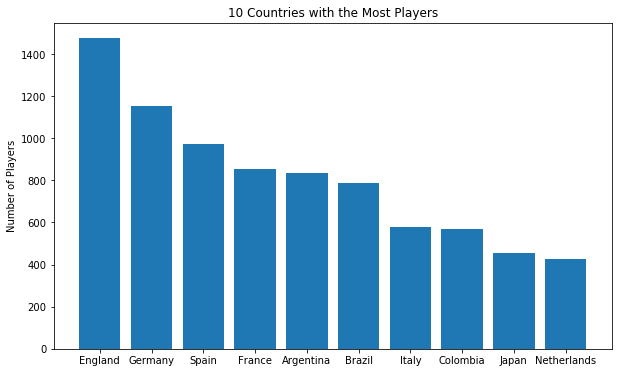

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("10 Countries with the Most Players")
ax.set_ylabel("Number of Players")

labels = list(top_10.index)
values = list(top_10.values)
ax.bar(labels, values)

**2) Below is code for a scatter plot for the player stats `StandingTackle` and `SlidingTackle`**

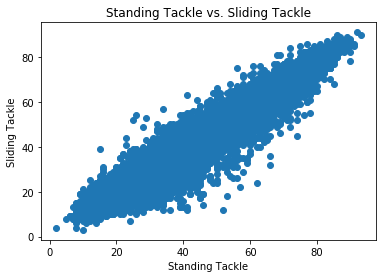

In [5]:
fig, ax = plt.subplots()

ax.set_title('Standing Tackle vs. Sliding Tackle')
ax.set_xlabel('Standing Tackle')
ax.set_ylabel('Sliding Tackle')

x = df['StandingTackle']
y = df['SlidingTackle']

ax.scatter(x, y)

**How would you describe the relationship between these two features?**

In [ ]:
# These two features are highly correlated.